# **IMPORT LIBRARIES**

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import datetime
import warnings

# **UPLOAD DATA**

In [369]:
FPT = pd.read_csv("FPT.csv")
MSN = pd.read_csv("MSN.csv")
PNJ = pd.read_csv("PNJ.csv")
VIC = pd.read_csv("VIC.csv")

In [370]:
#Kiểm tra một vài mẫu dữ liệu của FPT,MSN,PNJ,VIC
FPT.head(3),PNJ.head(3),MSN.head(3),VIC.head(3)

(  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
 0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
 1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
 2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0,
   Ticker       Date/Time   Open   High    Low  Close  Volume  Open Interest
 0    PNJ  2/28/2018 9:15  78.14  78.99  78.14  78.99     270              0
 1    PNJ  2/28/2018 9:16  78.94  78.94  78.94  78.94      10              0
 2    PNJ  2/28/2018 9:19  78.14  78.14  78.14  78.14     283              0,
   Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
 0    MSN  12/25/2017 9:15  73.1  73.1  73.1   73.1    4210              0
 1    MSN  12/25/2017 9:16  73.0  73.0  73.0   73.0    5000              0
 2    MSN  12/25/2017 9:18  73.5  73.5  73.5   73.5     210              0,
   Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
 0

# **PREPROCESS DATA**

In [371]:
#Ta nhận thấy rằng cột "Ticker" và "Open Interest" gồm các giá trị giống nhau nên có thể bỏ các cột dữ liệu này vì nó không ảnh hưởng đến quá trình dự đoán sau này
FPT = FPT.drop(columns=["Ticker","Open Interest"])

# Tương tự với MSN, PNJ, VIC sau khi kiểm tra và nhận thấy cũng tương tự với FPT
MSN = MSN.drop(columns=["Ticker","Open Interest"])
PNJ = PNJ.drop(columns=["Ticker","Open Interest"])
VIC = VIC.drop(columns=["Ticker","Open Interest"])

In [372]:
FPT.head(2),PNJ.head(2),MSN.head(2),VIC.head(2)

(         Date/Time   Open   High    Low  Close  Volume
 0  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410
 1  12/25/2018 9:16  30.81  30.81  30.81  30.81     190,
         Date/Time   Open   High    Low  Close  Volume
 0  2/28/2018 9:15  78.14  78.99  78.14  78.99     270
 1  2/28/2018 9:16  78.94  78.94  78.94  78.94      10,
          Date/Time  Open  High   Low  Close  Volume
 0  12/25/2017 9:15  73.1  73.1  73.1   73.1    4210
 1  12/25/2017 9:16  73.0  73.0  73.0   73.0    5000,
          Date/Time  Open  High   Low  Close  Volume
 0  10/17/2018 9:39  98.5  98.5  98.5   98.5     390
 1  10/17/2018 9:40  98.5  98.5  98.5   98.5     760)

In [373]:
# Chuyển dạng dữ liệu của cột "Date/Time" thành datetime
FPT["Date/Time"] = pd.to_datetime(FPT["Date/Time"])
print(FPT["Date/Time"].dtypes)

PNJ["Date/Time"] = pd.to_datetime(PNJ["Date/Time"])
print(PNJ["Date/Time"].dtypes)

MSN["Date/Time"] = pd.to_datetime(MSN["Date/Time"])
print(MSN["Date/Time"].dtypes)

VIC["Date/Time"] = pd.to_datetime(VIC["Date/Time"])
print(VIC["Date/Time"].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


# **ANALYSIS DATA**

## FPT

In [374]:
# Giá trị thấp nhất của giá đóng cửa
min_close_FPT = FPT['Close'].min()
print(min_close_FPT)

# Giá trị cao nhất của giá đóng cửa
max_close_FPT = FPT['Close'].max()
print(max_close_FPT)

30.25
58.4


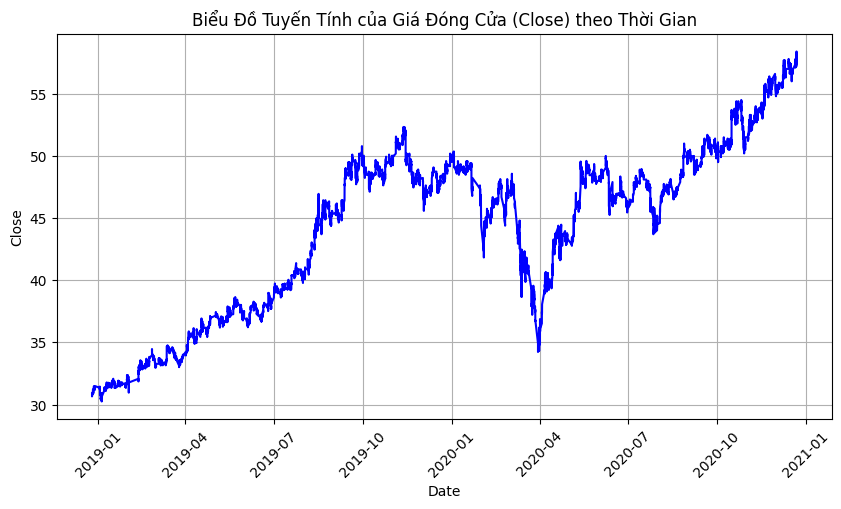

In [375]:
# Vẽ biểu đồ tuyến tính
plt.figure(figsize=(10, 5))

# Vẽ đường tuyến tính cho cột 'Close' theo 'Date/Time'
plt.plot(FPT['Date/Time'], FPT['Close'],color='b')

# Thêm tiêu đề và nhãn
plt.title('Biểu Đồ Tuyến Tính của Giá Đóng Cửa (Close) theo Thời Gian')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)

+ Giai đoạn 2019 đến cuối năm 2020: giá cổ phiếu tăng dần cho thấy công ty đã trải qua một giai đoạn phát triển mạnh mẽ.

+ Giá cổ phiếu giảm mạnh vào đầu 2020: có thể liên quan về sự tác động của COVID-19.

+ Giai đoạn phục hồi: sau giai đoạn giảm mạnh giá cổ phiểu đã tiếp tục xu hướng tăng, cho thấy công ty thích nghi tốt với tình trạng kinh tế chung và khả năng phục hồi tốt

## MSN 

In [376]:
# Giá trị thấp nhất của giá đóng cửa
min_close_MSN = MSN['Close'].min()
print(min_close_MSN)

# Giá trị cao nhất của giá đóng cửa
max_close_MSN = MSN['Close'].max()
print(max_close_MSN)

46.4
118.0


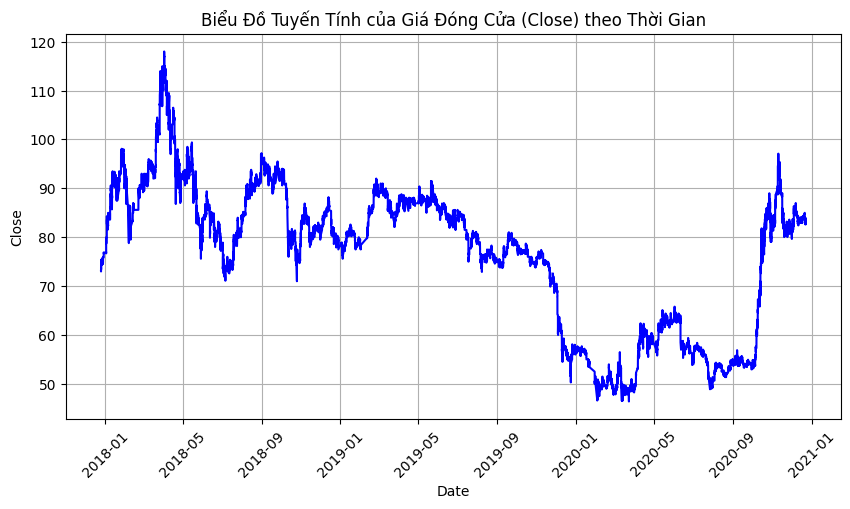

In [377]:
# Vẽ biểu đồ tuyến tính
plt.figure(figsize=(10, 5))

# Vẽ đường tuyến tính cho cột 'Close' theo 'Date/Time'
plt.plot(MSN['Date/Time'], MSN['Close'],color='b')

# Thêm tiêu đề và nhãn
plt.title('Biểu Đồ Tuyến Tính của Giá Đóng Cửa (Close) theo Thời Gian')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)

+ Trong giai đoạn từ đầu 2018 đến cuối 2020: giá cổ phiếu có xu hướng giảm dần và dài hạn.

+ Biến động lớn trong 2018: giá cổ phiếu đạt đỉnh ở mức trên 115, sau đó giảm mạnh xuống còn khoảng trên 70 vào giữa năm. Tuy đã có sự phục hồi nhẹ nhưng vẫn tiếp tục dao động mạnh vào cuối năm. Có thể thấy giai đoạn 2018 có nhiều biến động đối với công ty.

+ Đầu năm 2020: giá cố phiếu lại tiếp tục giảm mạnh xuống mức dưới 60 (có thể là do sự tác động của đại dịch COVID-19).

+ Giai đoạn cuối năm 2020: sau đợt suy giảm lớn, giá cổ phiếu đã tăng đáng kể lên mức gần 90 cho thấy sự phục hồi mạnh mẽ của công ty.

## PNJ

In [378]:
# Giá trị thấp nhất của giá đóng cửa
min_close_PNJ = PNJ['Close'].min()
print(min_close_PNJ)

# Giá trị cao nhất của giá đóng cửa
max_close_PNJ = PNJ['Close'].max()
print(max_close_PNJ)

44.14
100.16


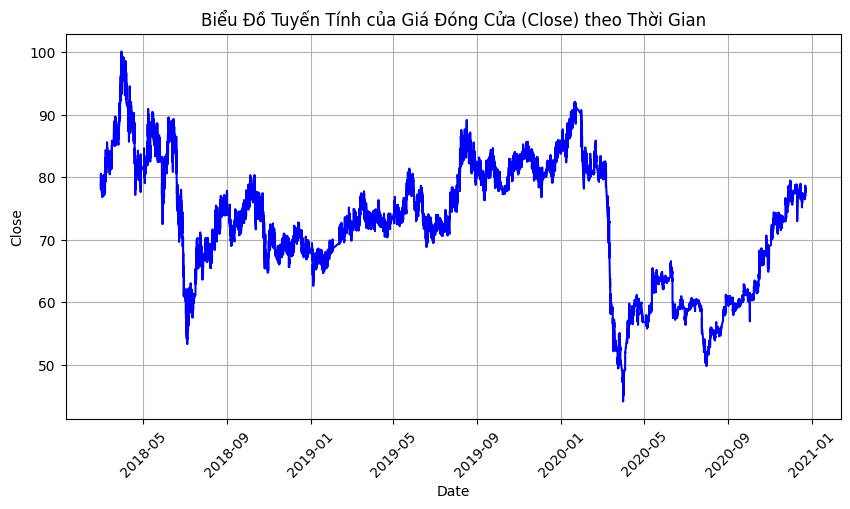

In [379]:
# Vẽ biểu đồ tuyến tính
plt.figure(figsize=(10, 5))

# Vẽ đường tuyến tính cho cột 'Close' theo 'Date/Time'
plt.plot(PNJ['Date/Time'], PNJ['Close'],color='b')

# Thêm tiêu đề và nhãn
plt.title('Biểu Đồ Tuyến Tính của Giá Đóng Cửa (Close) theo Thời Gian')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)

+ Trong năm 2018: giá cổ phiếu có xu hướng tăng mạnh vào đầu năm, đạt đỉnh gần 100 nhưng sau đó giảm mạnh xuống khoảng 60 vào giữa năm.

+ Từ 2019 đến đầu 2020: giá cổ phiếu duy trì mức ổn định từ 70-80.

+ Đầu 2020: giá cổ phiếu giảm sâu xuống đến mức gần 50 và tất nhiên có thể là do COVID-19.

+ Sau giai đoạn giảm mạnh: từ giữa năm 2020, giá cổ phiếu phục hồi nhanh chóng và quay trở lại mức trên 80 cho thấy khả năng phục hồi kinh tế và chiến lược công ty đề ra rất hiệu quả.


## VIC

In [380]:
# Giá trị thấp nhất của giá đóng cửa
min_close_VIC = VIC['Close'].min()
print(min_close_VIC)

# Giá trị cao nhất của giá đóng cửa
max_close_VIC = VIC['Close'].max()
print(max_close_VIC)

68.0
126.5


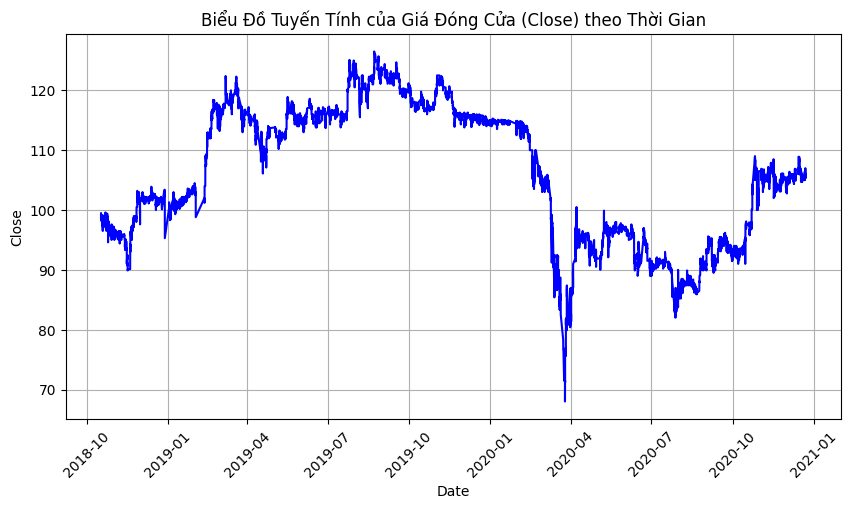

In [381]:
# Vẽ biểu đồ tuyến tính
plt.figure(figsize=(10, 5))

# Vẽ đường tuyến tính cho cột 'Close' theo 'Date/Time'
plt.plot(VIC['Date/Time'], VIC['Close'],color='b')

# Thêm tiêu đề và nhãn
plt.title('Biểu Đồ Tuyến Tính của Giá Đóng Cửa (Close) theo Thời Gian')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)

+ Giai đoạn 2018 đến cuối năm 2019: giá cổ phiếu có xu hướng tăng đạt đỉnh trên 120 vào giữa 2019, nhìn chung không nhận thấy sự biến động lớn nào gây ảnh hưởng đến sự phát triển của công ty.

+ Giai đoạn cuối 2019 đến giữa năm 2020: xu hướng giảm sâu (COVID-19 hoặc các vấn đề nội tại của công ty) từ trên 120 giảm mạnh còn dưới 70.

+ Giai đoạn giữa 2020 đến đầu 2021: giá cổ phiếu có dấu hiệu phục hồi rất tốt chứng minh sự phấn đấu và đề ra chiến lược hợp lý của công ty nhưng không thể vượt qua ngưỡng cao như trước.

# **UTILIZING MODELS**

## **Long Short Term Memory**

### FPT - Có sử dụng Standard Scaler

In [382]:
data_target = FPT[["Close"]].values

# Chuẩn hóa dữ liệu

scaler_target = StandardScaler()
scaled_target = scaler_target.fit_transform(data_target)

# Kích thước cửa sổ
window_size = 200

# Tạo dữ liệu đầu vào và đầu ra
def create_dataset(data,window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [383]:
# Tạo mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))

# Dự đoán dữ liệu kiểm tra
predictions = model.predict(X_test)

# Chuyển về giá trị thực
predicted_prices = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, predicted_prices)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1216/1216 ━━━━━━━━━━━━━━━━━━━━ 294s 238ms/step - loss: 0.0139 - val_loss: 9.0305e-04
608/608 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step
MSE: 0.036525465299944146


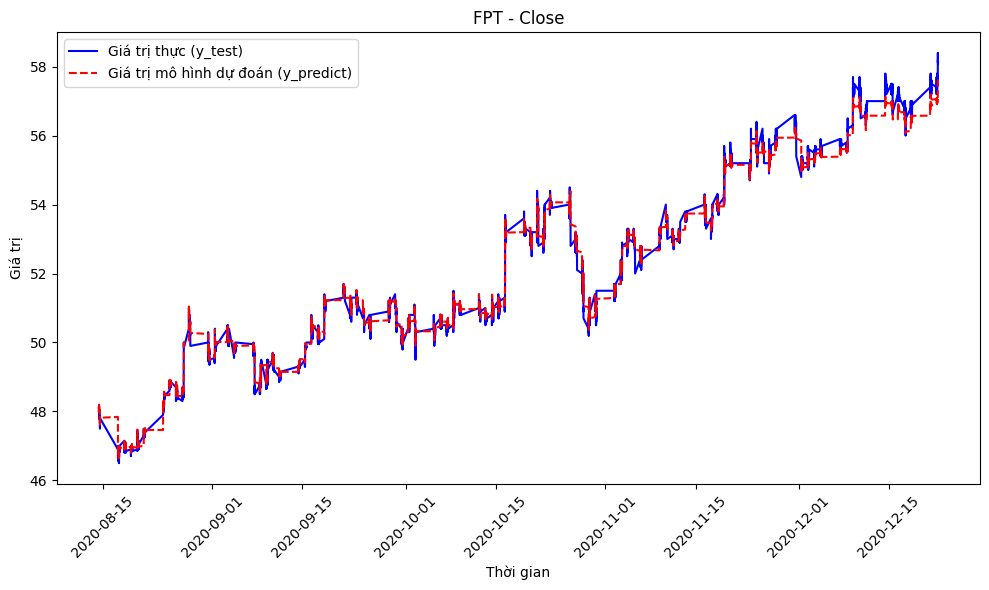

In [384]:
dates = FPT['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test_actual, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predicted_prices, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("FPT - Close")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### FPT - Không Scale dữ liệu

In [409]:
data_target = FPT[["Close"]].values

X, y = create_dataset(data_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [410]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1216/1216 ━━━━━━━━━━━━━━━━━━━━ 290s 235ms/step - loss: 255.9403 - val_loss: 6.9265
608/608 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step
MSE: 6.92651459905799


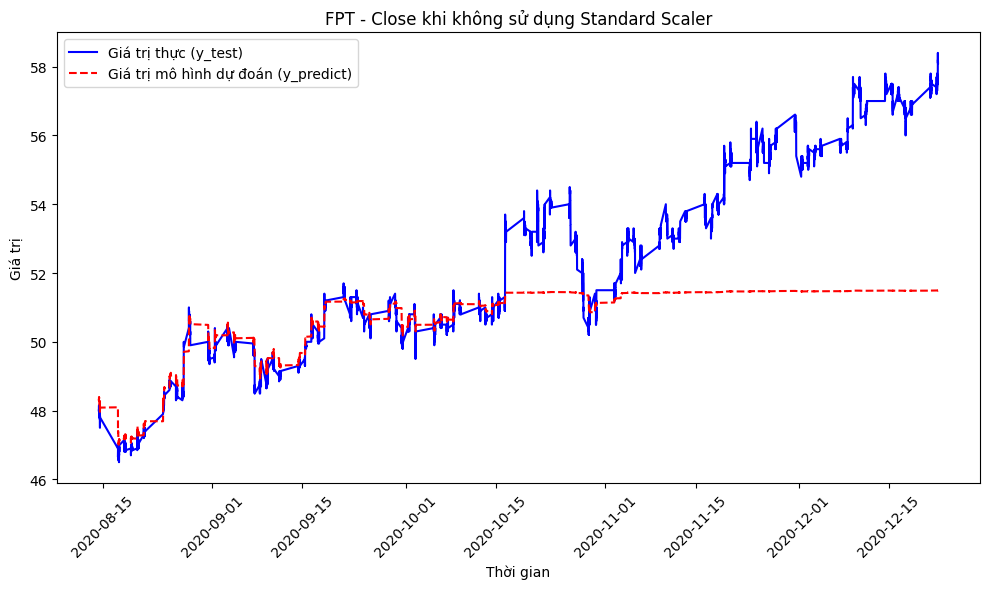

In [411]:
dates = FPT['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predictions, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("FPT - Close khi không sử dụng Standard Scaler")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### MSN - Có sử dụng Standard Scaler

In [388]:
data_target = MSN[["Close"]].values

scaled_target = scaler_target.fit_transform(data_target)

X, y = create_dataset(scaled_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [389]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predicted_prices = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, predicted_prices)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1690/1690 ━━━━━━━━━━━━━━━━━━━━ 448s 262ms/step - loss: 0.0251 - val_loss: 3.7593e-04
845/845 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step
MSE: 0.08937293655547474


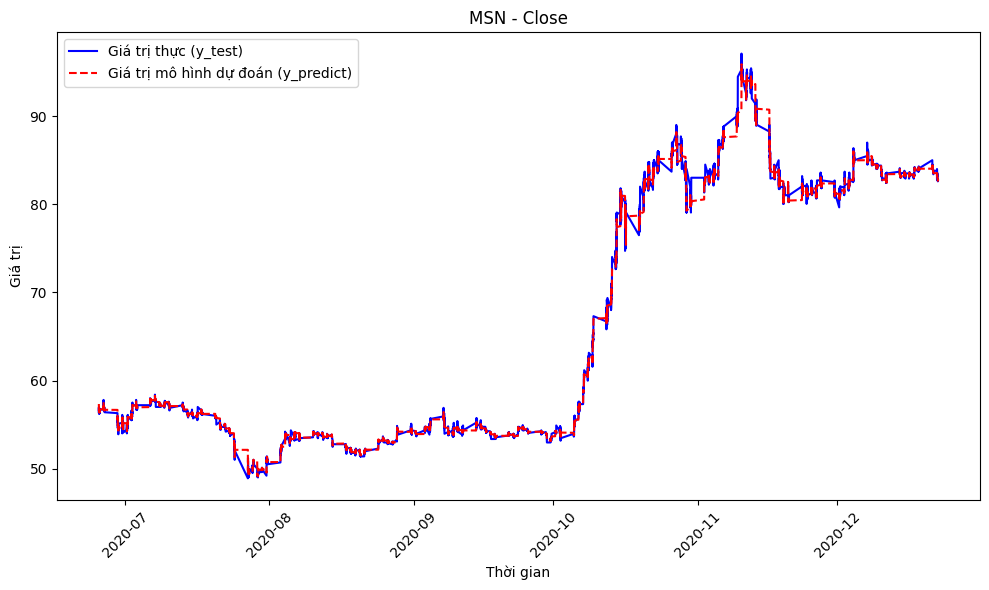

In [390]:
dates = MSN['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test_actual, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predicted_prices, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("MSN - Close")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### MSN - Không Scale dữ liệu

In [391]:
data_target = MSN[["Close"]].values

X, y = create_dataset(data_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [392]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1690/1690 ━━━━━━━━━━━━━━━━━━━━ 423s 248ms/step - loss: 869.9609 - val_loss: 0.0857
845/845 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step
MSE: 0.085675973349048


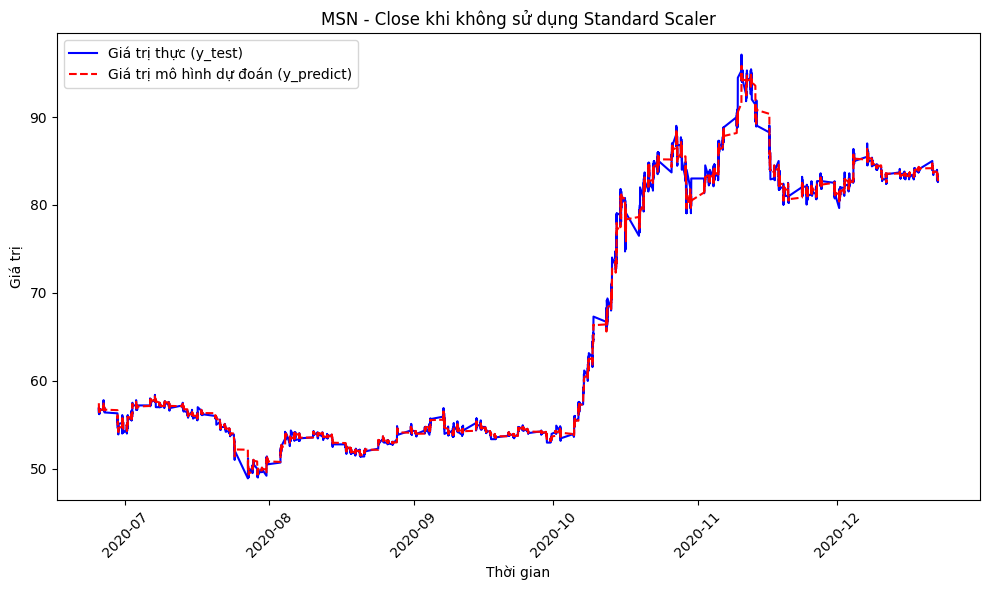

In [393]:
dates = MSN['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predictions, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("MSN - Close khi không sử dụng Standard Scaler")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### PNJ - Có sử dụng Standard Scaler

In [406]:
data_target = PNJ[["Close"]].values

scaled_target = scaler_target.fit_transform(data_target)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [407]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predicted_prices = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, predicted_prices)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1264/1264 ━━━━━━━━━━━━━━━━━━━━ 301s 235ms/step - loss: 2210.3203 - val_loss: 0.1045
632/632 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step
MSE: 10.24310708301151


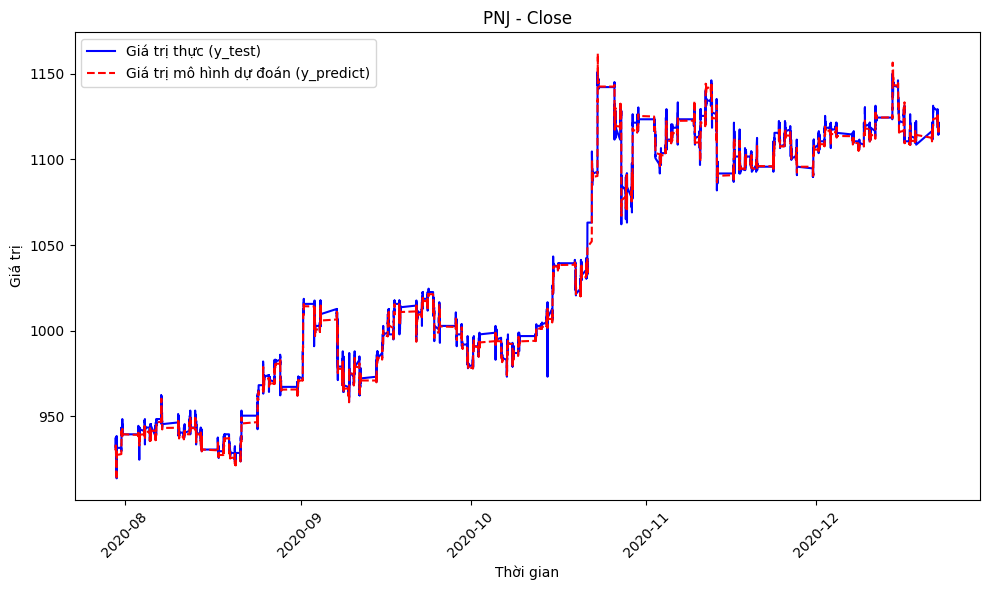

In [408]:
dates = PNJ['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test_actual, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predicted_prices, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("PNJ - Close")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### PNJ - Không Scale dữ liệu

In [397]:
data_target = PNJ[["Close"]].values

X, y = create_dataset(data_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [398]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1564/1564 ━━━━━━━━━━━━━━━━━━━━ 377s 238ms/step - loss: 778.7945 - val_loss: 0.2261
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step
MSE: 0.2260882753142628


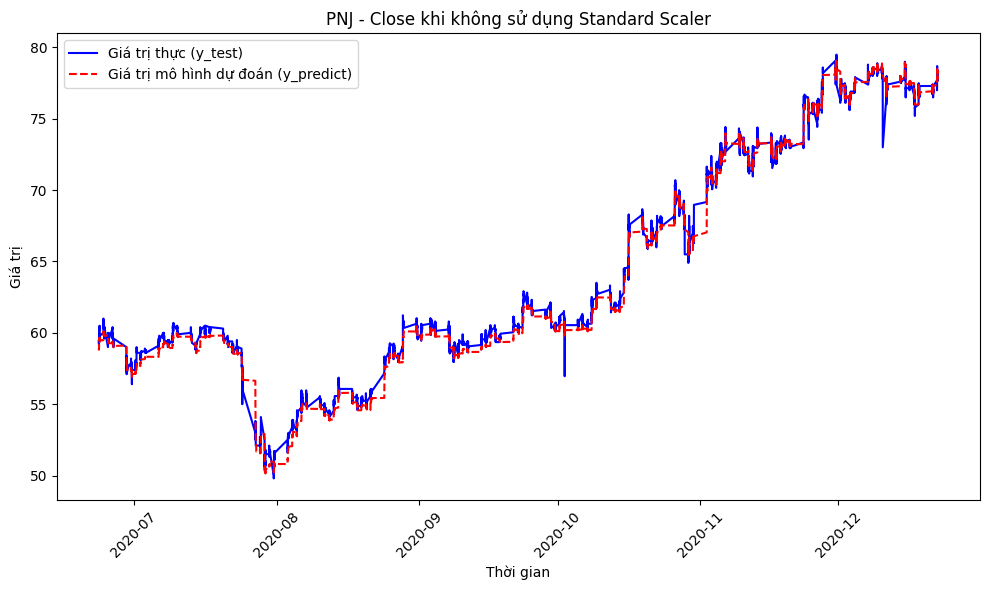

In [399]:
dates = PNJ['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predictions, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("PNJ - Close khi không sử dụng Standard Scaler")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### VIC - Có sử dụng Standard Scaler

In [400]:
data_target = VIC[["Close"]].values

scaled_target = scaler_target.fit_transform(data_target)

X, y = create_dataset(scaled_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [401]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predicted_prices = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, predicted_prices)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1264/1264 ━━━━━━━━━━━━━━━━━━━━ 301s 235ms/step - loss: 0.0222 - val_loss: 5.3823e-04
632/632 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step
MSE: 0.07173929263307582


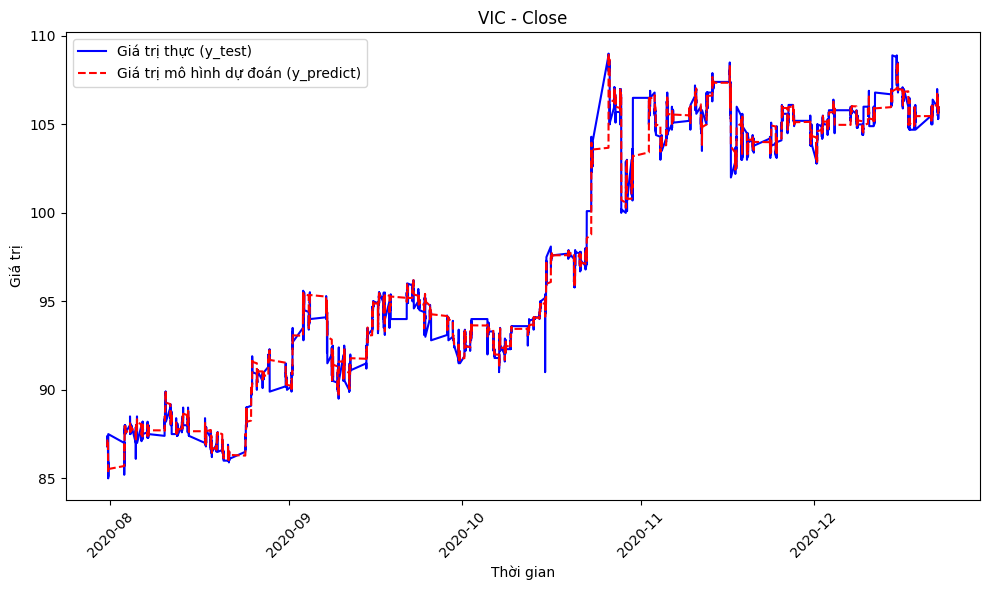

In [402]:
dates = VIC['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test_actual, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predicted_prices, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("VIC - Close")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### VIC - Không Scale dữ liệu

In [403]:
data_target = VIC[["Close"]].values

X, y = create_dataset(data_target, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape dữ liệu cho LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

In [404]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test))

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1264/1264 ━━━━━━━━━━━━━━━━━━━━ 299s 233ms/step - loss: 2382.2849 - val_loss: 0.0775
632/632 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step
MSE: 0.07752239420560553


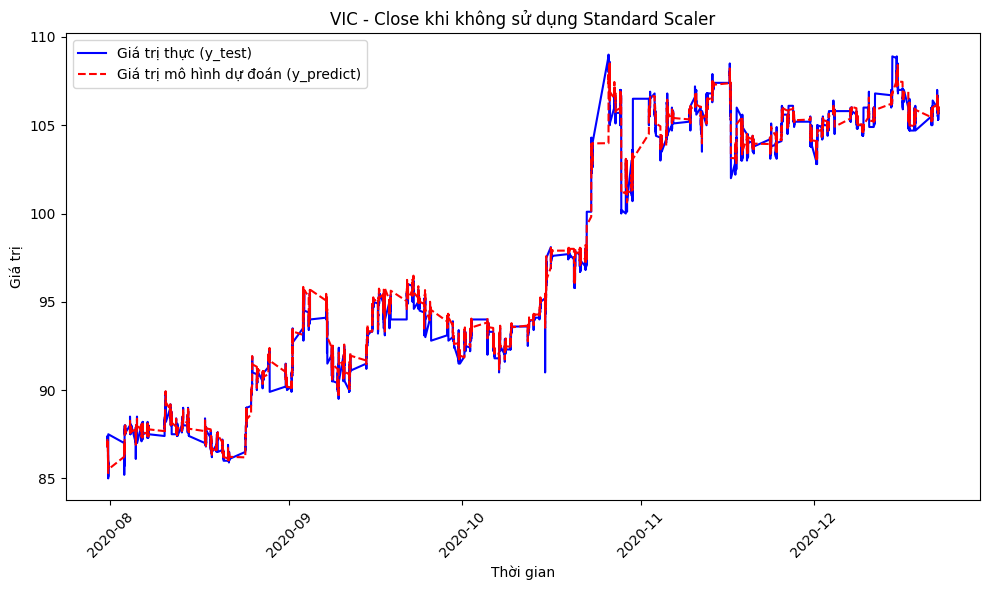

In [405]:
dates = VIC['Date/Time'].values[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test, label="Giá trị thực (y_test)", color='blue')
plt.plot(dates, predictions, label="Giá trị mô hình dự đoán (y_predict)", color='red', linestyle='--')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.title("VIC - Close khi không sử dụng Standard Scaler")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**KẾT LUẬN:**

+ Mô hình LSTM dự đoán khá tốt đối với bài toán cổ phiếu.

+ Trước khi đưa dữ liệu cho mô hình train ta nên scale dữ liệu để đồng nhất về giá trị từ đó giúp mô hình học nhanh hơn.

**Bài làm của em có thể còn nhiều hạn chế, em sẽ rất vui khi được các anh/chị nhận xét và góp ý. Em mong bản thân có cơ hội được làm việc tại Công ty FINPROS để có thể học hỏi nhiều kiến thức mới và đóng góp cho sự phát triển của Công ty. Em xin cảm ơn anh/chị.**